# Segmentation with Ground Truth

This notebook shows the steps I took to segment the image from the ABRF-LMRG Image Analysis Study.  Details about the study can be found here

https://sites.google.com/view/lmrg-image-analysis-study

## Open and show input

Open the input file with a special helper that open imagej tifs and reads and returns the spacings along with the image data.  Then show xyz maximum projections.

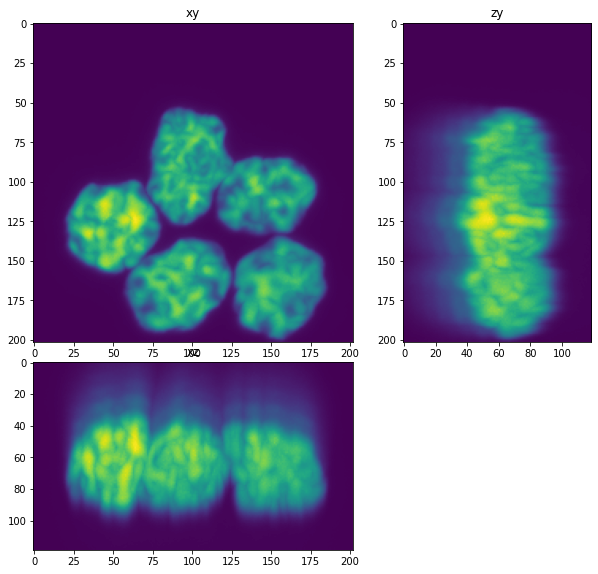

In [10]:
from tnia.io.tifffile_helper import open_ij3D
from tnia.plotting.projections import show_xyz_max, show_xyz_slice
from skimage.io import imread
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc

input_dir = 'D:\\m2lasers\\simulation'
input_name=input_dir+"\\image.tif"

im_orig=imread(input_name)

#im_orig, sx, sy, sz = open_ij3D(input_name)
#print(sx, sy, sz)
fig=show_xyz_max(im_orig)

# Open and show ground truth


In [3]:
def MSE(a,b):
    return np.square(np.subtract(a,b)).mean()

def RMSE(a,b):
    return np.sqrt(MSE(a,b))

original sum intensity 10979002000.0
imaged sum intensity 10811612000.0
ratio 0.9847536


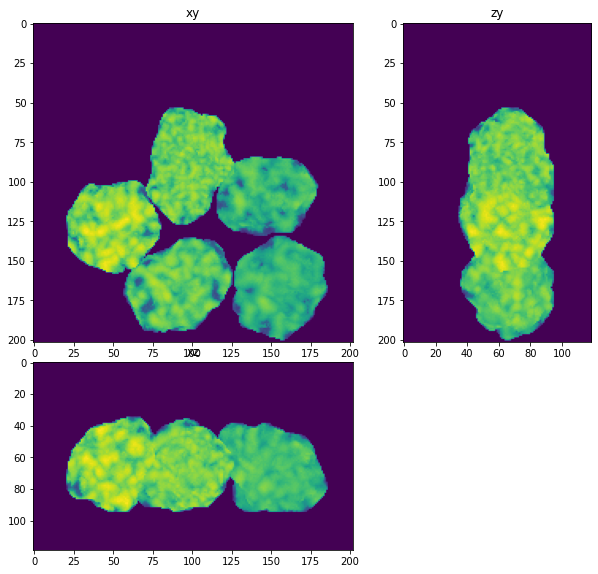

In [4]:
#D:\images             \tnia-python-images\notebooks\segmentaion\nuclei
from skimage.io import imread

truth_name=input_dir+"\\phantom.tif"

ground_truth = imread(truth_name)
ground_truth = ground_truth.astype('float32')
print('original sum intensity',ground_truth.sum())
print('imaged sum intensity',im_orig.sum())
print('ratio',im_orig.sum()/ground_truth.sum())


fig=show_xyz_max(ground_truth)

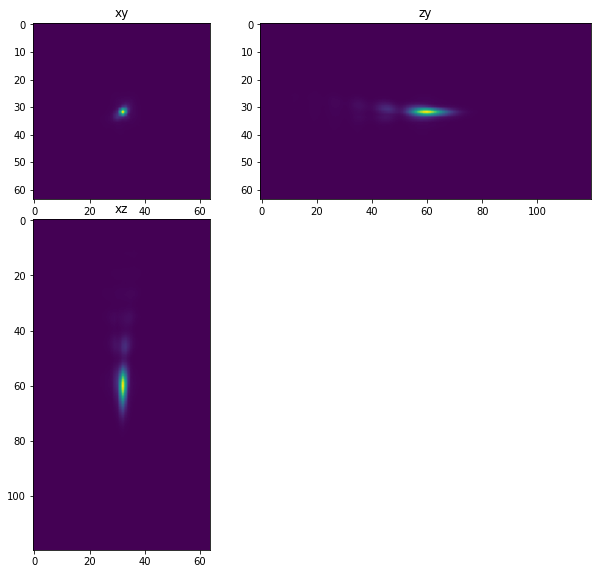

In [5]:
psf_name=input_dir+"\\psf.tif"

psf=imread(psf_name)
#psf, sx, sy, sz = open_ij3D(input_name)
'''
print(sx, sy, sz)

psf_xy = 129
psf_z = 51

x_start=int(psf.shape[2]/2-psf_xy/2)
y_start=int(psf.shape[1]/2-psf_xy/2)
z_start=int(psf.shape[0]/2-psf_z/2)

psf=psf[z_start:z_start+psf_z,y_start:y_start+psf_xy,x_start:x_start+psf_xy]
'''
fig=show_xyz_max(psf)

In [17]:
im_orig=im_orig.astype('float32')
psf=psf.astype('float32')

In [26]:
im_decon=richardson_lucy_nc(im_orig, psf, 1000, 0.0002)

get lib


In [23]:
im_orig=im_orig-im_orig.min()+1

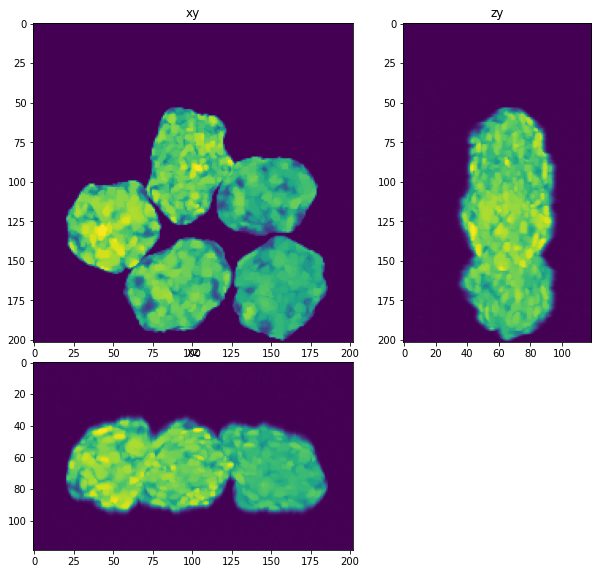

In [28]:
fig=show_xyz_max(im_decon)

get lib


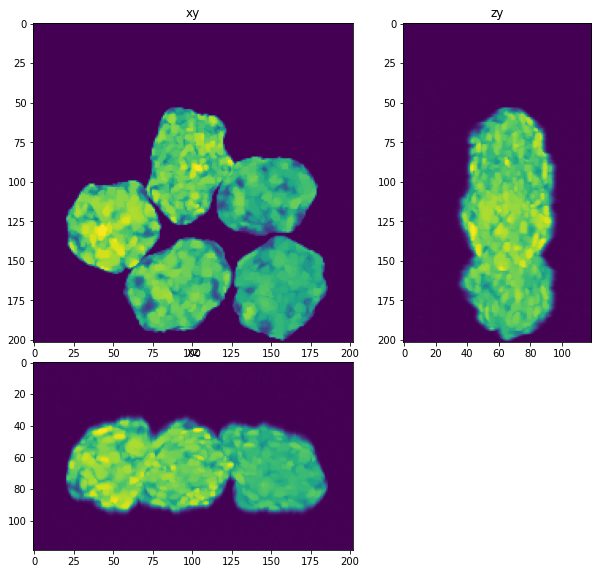

In [27]:


#im_decon_100=richardson_lucy_nc(im_orig, psf, 100, 0)
#im_decon_200=richardson_lucy_nc(im_orig, psf, 200, 0)
#im_decon_300=richardson_lucy_nc(im_orig, psf, 300, 0)
#im_decon_400=richardson_lucy_nc(im_orig, psf, 400, 0)
im_decon_1000=richardson_lucy_nc(im_orig, psf, 1000, 0)

fig=show_xyz_max(im_decon)

In [70]:
from skimage.filters import threshold_otsu
thresholded = im_decon_tv>threshold_otsu(im_decon_tv)

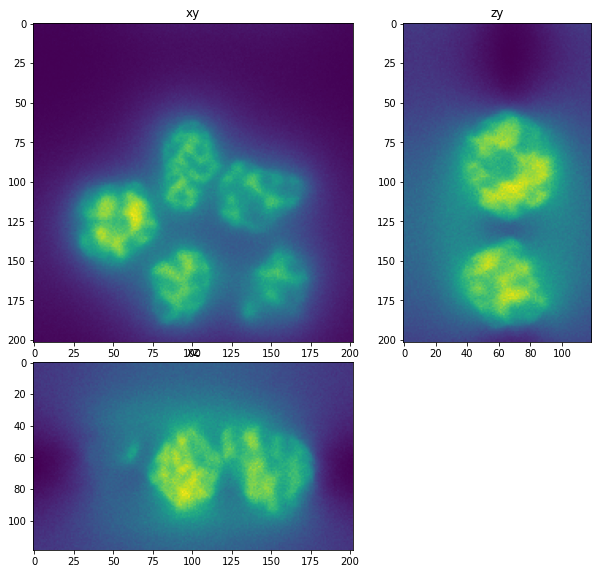

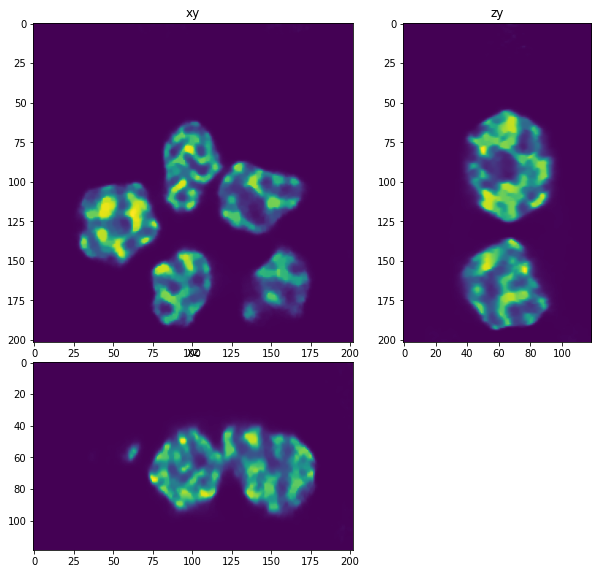

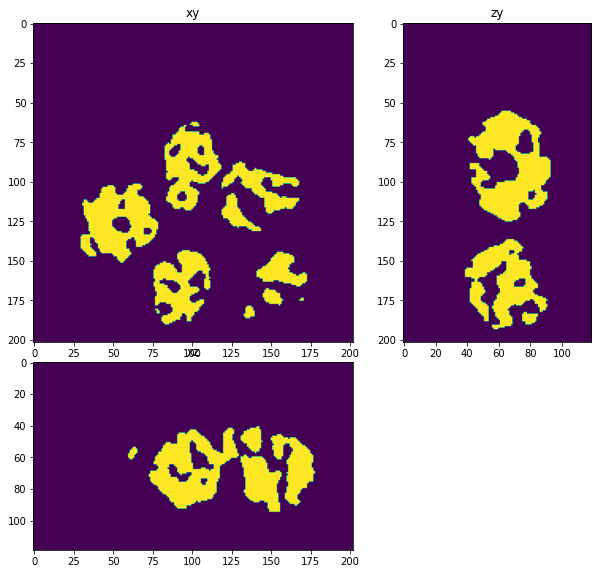

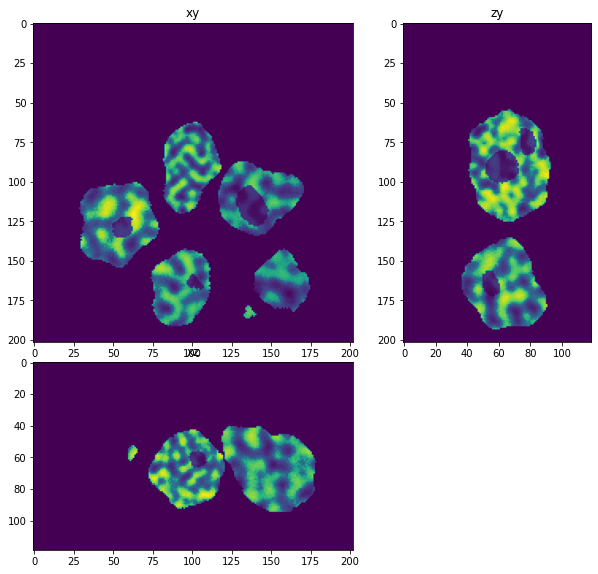

In [72]:
fig = show_xyz_slice(im_orig, 100,100,50,1)
fig = show_xyz_slice(im_decon_tv, 100,100,50,1)
fig = show_xyz_slice(thresholded, 100,100,50,1)
fig = show_xyz_slice(ground_truth, 100,100,50,1)


In [60]:
print(RMSE(ground_truth,im_orig))
print(RMSE(ground_truth,im_decon_100))
print(RMSE(ground_truth,im_decon_200))
print(RMSE(ground_truth,im_decon_300))
print(RMSE(ground_truth,im_decon_400))
print(RMSE(ground_truth,im_decon_1000))
print(RMSE(ground_truth,im_decon_tv))



7267.49
3689.2385
3058.4001
2763.766
2596.5435
2330.8367
2188.2297


In [55]:
print(im_decon.sum()/ground_truth.sum())

1.006707


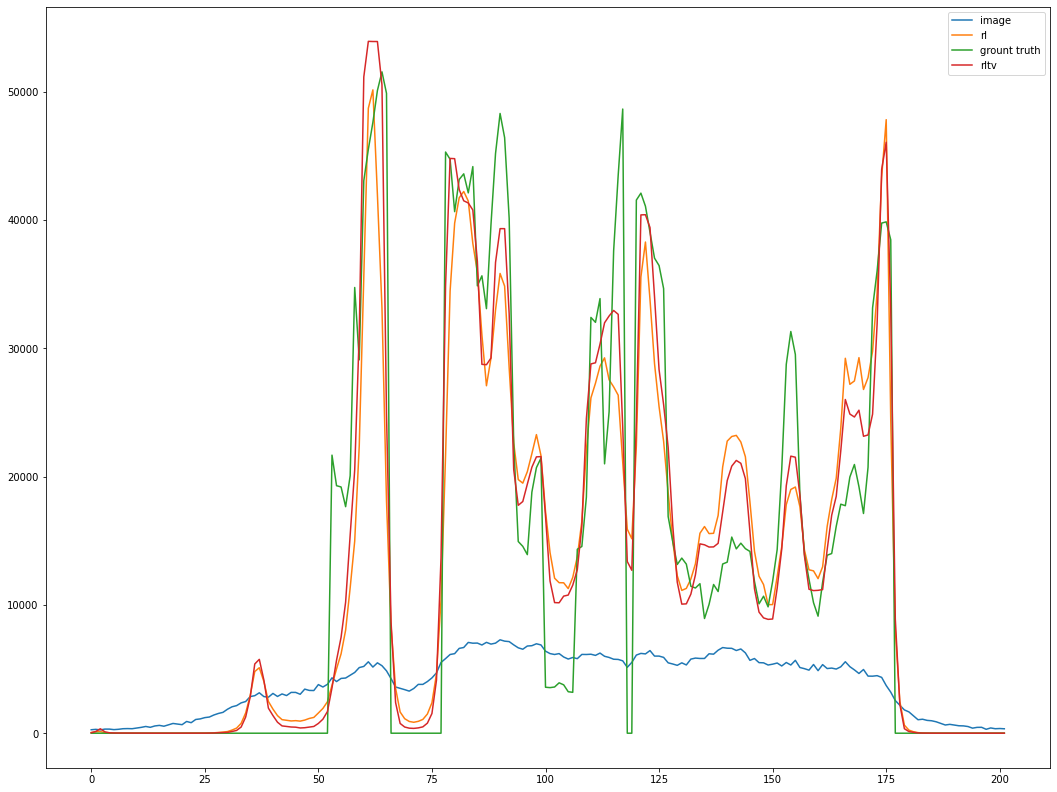

In [25]:
import matplotlib.pyplot as plt
s=im_orig.shape

fig, ax = plt.subplots(figsize=(18,14))

line=im_orig[int(s[0]/2),int(s[1]/2),:]
ax.plot(line, label = 'image')

line2=im_decon[int(s[0]/2),int(s[1]/2),:]
ax.plot(line2, label='rl')
line3=ground_truth[int(s[0]/2),int(s[1]/2),:]
ax.plot(line3, label='grount truth')
line4=im_decon_tv[int(s[0]/2),int(s[1]/2),:]
ax.plot(line4, label='rltv')
ax.legend()

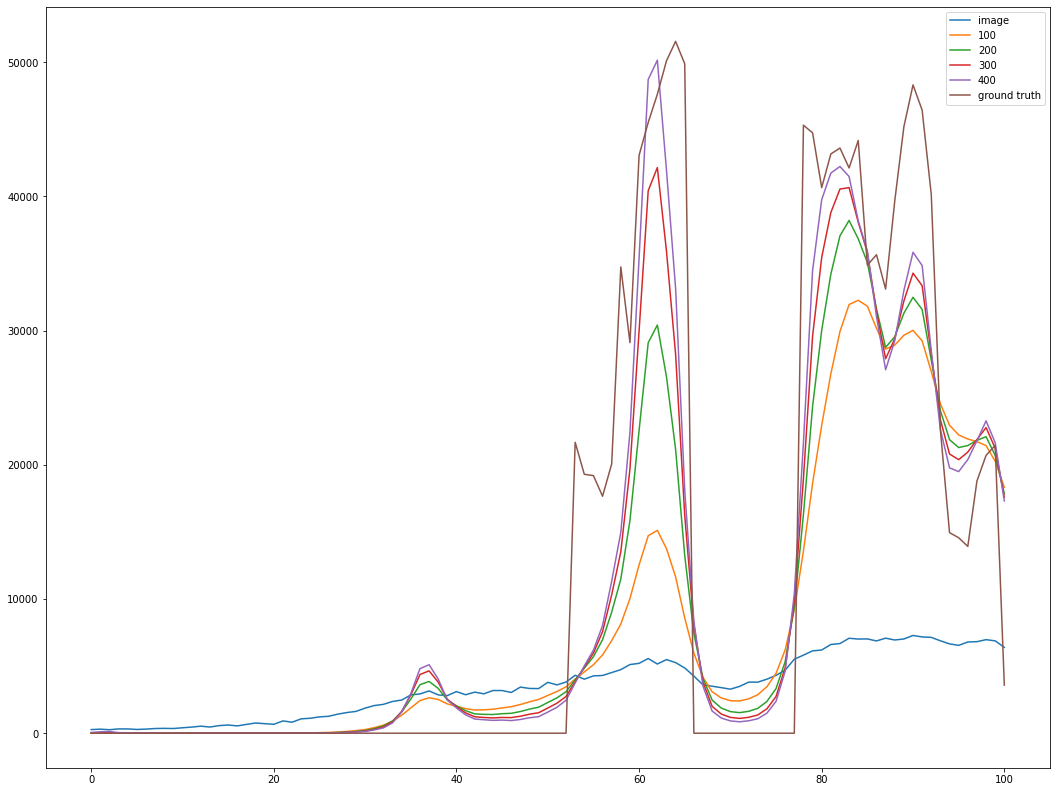

In [42]:
import matplotlib.pyplot as plt
s=im_orig.shape

fig, ax = plt.subplots(figsize=(18,14))

from skimage.draw import line
rr, cc =  line(int(s[1]/2),0,int(s[1]/2),int(s[2]/2-1))
z=int(s[0]/2),

line=im_orig[z, rr, cc]
ax.plot(line, label = 'image')

line2=im_decon_100[z, rr, cc]
ax.plot(line2, label='100')

line4=im_decon_200[z, rr, cc]
ax.plot(line4, label='200')
ax.legend()

line4=im_decon_300[z, rr, cc]
ax.plot(line4, label='300')
ax.legend()

line4=im_decon_400[z, rr, cc]
ax.plot(line4, label='400')
ax.legend()

line3=ground_truth[z, rr, cc]
ax.plot(line3, label='ground truth')
ax.legend()


C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\matplotlib\transforms.py:1751: RuntimeWarning: coroutine 'get_msg' was never awaited
  super().__init__(*args, **kwargs)


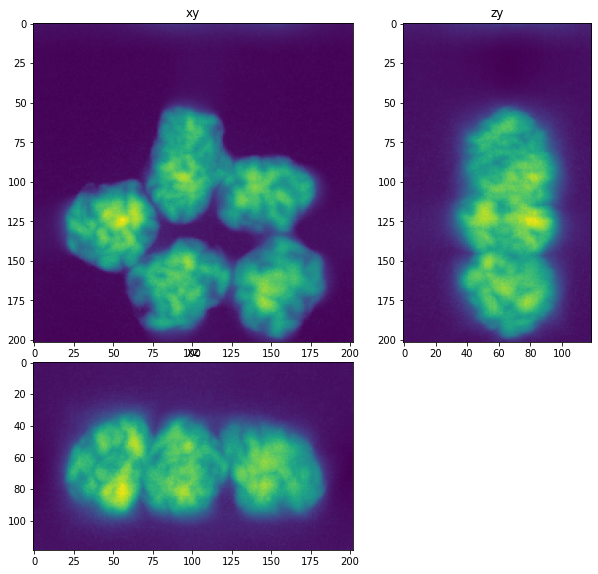

In [113]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

background_subtracted = cle.top_hat_box(im_orig, radius_x=20, radius_y=20, radius_z=5)
background_subtracted = cle.pull(background_subtracted)
fig = show_xyz_max(background_subtracted)

In [27]:
test=a-d
test.min()

-1.0

In [31]:
# start napari
import napari
viewer = napari.Viewer()

# show images
#viewer.add_labels(labels.astype('int32'))#, scale = [sz,sy,sz])
#viewer.add_image(ground_truth)
#viewer.add_image(cle.pull(background_subtracted))
#viewer.add_image(im_decon)

#viewer.add_image(ground_truth)
viewer.add_image(im_orig)
viewer.add_image(im_decon)

#viewer.add_labels(binary, scale = [sz,sy,sz])


C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\jupyter_client\threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\base_events.py", line 618, i

<Image layer 'im_decon' at 0x1641b2f2e50>

## Data Table

At this step we create a data table.  We use a helper to compute the region properties of the objects in our labelling and return centroid, intensity and volume of the objects in a Pandas table.

In [43]:
from tnia.segmentation.pandas_helper import get_df_centroid_intensity_volume_3D
stats=get_df_centroid_intensity_volume_3D(labels, im_decon, sx, sy, sz)

stats.head()

,x,y,z,intensity,volume
0,20.967404,9.873032,4.549152,8.590300e+07,345.322919
1,6.907200,10.639381,5.885293,9.921165e+07,375.785646
2,14.521549,23.518101,8.890713,1.154779e+08,415.742492
3,22.821594,24.550776,9.922294,1.021065e+08,375.276759
4,25.035990,8.181050,13.156101,7.846584e+07,292.251497


## Plotting

At this point we have our data in a table and we can also use Pandas (and matplotlib) to create figure. It is not a very big table.  We'd need much more data to get significant statistics.  

<AxesSubplot:ylabel='Frequency'>

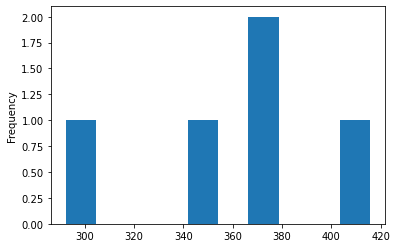

In [55]:
stats.volume.plot.hist()

In [38]:
import math
paddedsize=[im_orig.shape[0]+psf.shape[0],im_orig.shape[1]+psf.shape[1],im_orig.shape[2]+psf.shape[2]] 
padding = tuple(map(lambda i,j: ( math.ceil((i-j)/2), math.floor((i-j)/2) ),paddedsize,im_orig.shape))

In [39]:
padding

((65, 64), (128, 128), (128, 128))

In [35]:
paddedsize

(119, 202, 202, 129, 256, 256)

In [37]:
im_orig.shape

(119, 202, 202)

In [43]:
padding[0][1]

64